In [ ]:
!gdown --id 13m7JpglX7AL_hggkICfbbct-kUavyPbx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13m7JpglX7AL_hggkICfbbct-kUavyPbx
To: /content/SMIS電商與品牌近一年資料.zip
100% 61.1M/61.1M [00:00<00:00, 97.6MB/s]


In [ ]:
!unzip SMIS電商與品牌近一年資料.zip

Archive:  SMIS電商與品牌近一年資料.zip
  inflating: Products.csv            
  inflating: E_Products.csv          


In [ ]:
# Settings

sport = 'Training & Gym'
clothing = ['Leggings & Tights']  # ['Sports Bra', 'Leggings & Tights','']
time_range = ['2021/2/28','2022/5/9']
feature_cols = ['Feature','Material']  # Color, Gender
strList_cols = ['Color','Feature','Material']  # 資料中是以list儲存的columns 

In [ ]:
# funtioncs
import json

def check_clothing(clothing_list):
    
    clothing_list = list(map(str.strip, clothing_list.strip('][').replace("'", '').split(','))) 
    # 將讀近來文字的list轉換成list '[a,b,c]' -> [a,b,c]

    for i in clothing_list:
        if i in clothing:
            return True
    return False
    

In [ ]:
# Read Data
import pandas as pd
import numpy as np

E_Products = pd.read_csv('E_Products.csv',low_memory = False)
E_Products['CreateDate'] = pd.to_datetime(E_Products['CreateDate'])

Products = pd.read_csv('Products.csv',low_memory = False)
Products['CreateDate'] = pd.to_datetime(Products['CreateDate'])

In [ ]:
E_Products['Sport'] = E_Products['Sport'].fillna('others')
E_Products = E_Products[E_Products['Sport'].apply(lambda x: True if sport in x else False)]

Products['Sport'] = Products['Sport'].fillna('others')
Products = Products[Products['Sport'].apply(lambda x: True if sport in x else False)]

In [ ]:
E_Products['Sport']

5                                       ['Training & Gym']
11                                      ['Training & Gym']
26                                      ['Training & Gym']
40                                      ['Training & Gym']
43                           ['Running', 'Training & Gym']
                               ...                        
80822    ['Climbing', 'Running', 'Training & Gym', 'Yoga']
80828    ['Running', 'Training & Gym', 'Lifestyle', 'Yo...
80834    ['Tennis', 'Hiking & Trail', 'Walking', 'Golf'...
80841    ['Running', 'Training & Gym', 'Lifestyle', 'Yo...
80844    ['Hiking & Trail', 'Training & Gym', 'Running'...
Name: Sport, Length: 13874, dtype: object

In [ ]:
E_Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13874 entries, 5 to 80844
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     13874 non-null  int64         
 1   _id            13874 non-null  object        
 2   Store          13874 non-null  object        
 3   Url            13874 non-null  object        
 4   Gender         13517 non-null  object        
 5   ModifiedDate   13874 non-null  object        
 6   ReviewNumber   12617 non-null  float64       
 7   AverageRating  12537 non-null  float64       
 8   Price          13343 non-null  float64       
 9   RatingTrack    11316 non-null  object        
 10  PriceTrack     11316 non-null  object        
 11  CreateDate     13874 non-null  datetime64[ns]
 12  OldPrice       6505 non-null   float64       
 13  Brand          13838 non-null  object        
 14  Bullets        13874 non-null  object        
 15  Color          1313

In [ ]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14515 entries, 10 to 106323
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           14515 non-null  int64         
 1   _id                  14515 non-null  object        
 2   Url                  14515 non-null  object        
 3   Gender               14515 non-null  object        
 4   Brand                14515 non-null  object        
 5   StyleNumber          14515 non-null  object        
 6   ProductID            4819 non-null   object        
 7   AverageRating        12528 non-null  float64       
 8   ReviewNumber         12890 non-null  float64       
 9   Name                 14515 non-null  object        
 10  Color                3720 non-null   object        
 11  Bullets              14515 non-null  object        
 12  ImageUrl             14515 non-null  object        
 13  Price                14513 no

In [ ]:
# Selecting data

df_P = Products.loc[(Products['CreateDate'] >= pd.to_datetime(time_range[0])) & (Products['CreateDate'] <= pd.to_datetime(time_range[1]))]
df_E = E_Products.loc[(E_Products['CreateDate'] >= pd.to_datetime(time_range[0])) & (E_Products['CreateDate'] <= pd.to_datetime(time_range[1]))]
df_P['Clothing'] = df_P['Clothing'].fillna('[\'nan\']')
df_E['Clothing'] = df_E['Clothing'].fillna('[\'nan\']')

In [ ]:
import ast 
ls = [] 
s = set()
for i in df_P['Clothing'].unique():
    s = s|set(ast.literal_eval(i))
clothing_dic = dict(zip(list(s), len(list(s))*[0]))

In [ ]:
for i in df_P['Clothing']:
    for j in ast.literal_eval(i):
        clothing_dic[j] += 1 
sorted(clothing_dic.items(), key=lambda x: x[1])

[('Hardware', 1),
 ('Balls', 1),
 ('Softshells', 1),
 ('Surfing', 2),
 ("What's New", 2),
 ('Athletic & Sneakers', 2),
 ('Bags', 3),
 ('Selfcare', 4),
 ('Water Bottles', 4),
 ('We Made Too Much', 4),
 ('Headphones', 4),
 ('clothing', 5),
 ('Accessories', 6),
 ('women', 7),
 ('men', 7),
 ('Fleece', 11),
 ('Insulated & Down', 14),
 ('shoes', 15),
 ('Vest', 28),
 ('Windwear', 49),
 ('Compression wear', 50),
 ('Swimwear', 71),
 ('Other Accessories', 86),
 ('Polo', 89),
 ('Skirt & Dresses', 105),
 ('Headband & Sweatband', 118),
 ('Hats & Scarves', 232),
 ('Jackets & Vests', 459),
 ('Tops', 518),
 ('Sock', 622),
 ('Bottoms', 720),
 ('Long Sleeve', 733),
 ('Pants', 1201),
 ('Tank', 1448),
 ('Hoodie & Sweatshirt', 1471),
 ('Leggings & Tights', 1671),
 ('Sports Bra', 1707),
 ('Shorts', 1968),
 ('Short Sleeve', 2067)]

In [ ]:
df_P = df_P.loc[df_P['Clothing'].apply(lambda x: check_clothing(x))]
df_E = df_E.loc[df_E['Clothing'].apply(lambda x: check_clothing(x))]

# 電商評分分析

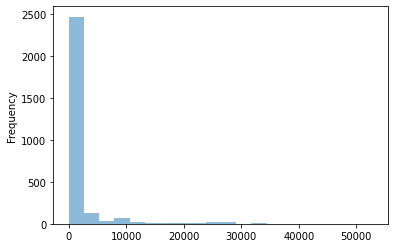

In [ ]:
df_E['ReviewNumber'].plot.hist(bins=20, alpha=0.5)

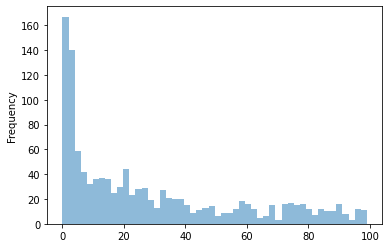

In [ ]:
df_E['ReviewNumber'][df_E['ReviewNumber']<100].plot.hist(bins=50, alpha=0.5)

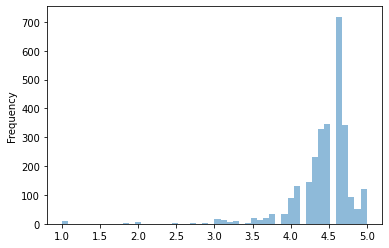

In [ ]:
df_E['AverageRating'].plot.hist(bins=50, alpha=0.5)

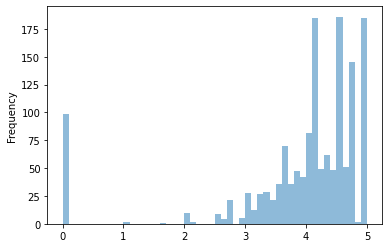

In [ ]:
df_P['AverageRating'].plot.hist(bins=50, alpha=0.5)

In [ ]:
from sklearn.linear_model import LinearRegression

data = df_E.dropna(subset = ['AverageRating'])
data = data[data['ReviewNumber']>20]
data_x = data[feature_cols]
data_x = data_x.fillna('[\'nan\']')
data_y = data['AverageRating']
import ast 
feature_strList_cols = []
other_feature_cols = []
for col in feature_cols:
    if col in strList_cols:
        feature_strList_cols.append(col)
        data_x[col] = data_x[col].apply(ast.literal_eval)
    else:
        other_feature_cols.append(col)
# Preprocess 3
from sklearn.preprocessing import MultiLabelBinarizer
mlb_list = []
df_list = [data_x[other_feature_cols]]
for col in feature_strList_cols:
    mlb = MultiLabelBinarizer()
    df = pd.DataFrame(mlb.fit_transform(data_x[col]),columns=mlb.classes_)
    df_list.append(df)
data_x = pd.concat(df_list, axis=1).dropna()
# reg = LinearRegression().fit(data_x, data_y)

In [ ]:
data_x['Silk'].sum()

4.0

In [ ]:
data_x['100% Cotton'].sum()

1.0

In [ ]:
for col in data_x.columns:
    if data_x[col].sum() < 10:
        data_x = data_x.drop(col, axis=1)
data_x = data_x.drop('all/any Spandex', axis=1)

In [ ]:
data_x

,Athleisure,一體成型,人體工學舒適設計,保暖禦寒,刷毛布,反光功能,單向導溼快乾,四面彈,抗紫外線,提升運動效能設計,...,舒適伸展,舒適平滑縫合,蒸發性涼感,Cotton Blended,Polyamide(Nylon) Blended,Polyester Blended,Spandex 11~20%,Spandex <= 10%,Spandex >= 21%,nan
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2186,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import statsmodels.api as sm
import numpy as np
X = sm.add_constant(data_x)
model = sm.OLS(data_y.values,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.44e-46
Time:                        14:23:13   Log-Likelihood:                -288.96
No. Observations:                2188   AIC:                             625.9
Df Residuals:                    2164   BIC:                             762.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.2912      0.047     91.606      0.000       4.199       4.383
Athleisure                  -0.1814      0.053     -3.452      0.001      -0.284      -0.078
一體成型                        -0.2165      0.020    -10.772      0.000      -0.256      -0.177
人體工學舒適設計                     0.1289      0.070      1.834      0.067      -0.009       0.267
保暖禦寒                        -0.0205      0.046     -0.441      0.659      -0.112       0.071
刷毛布                          0.0886      0.048      1.852      0.064      -0.005       0.182
反光功能                         0.1552      0.057      2.743      0.006       0.044       0.266
單向導溼快乾                       0.0554      0.030      1.818      0.069      -0.004       0.115
四面彈                          0.1296      0.019      6.806      0.000       0.092       0.167
抗紫外線                         0.0433      0.053      0.822      0.411      -0.060       0.147
提升運動效能設計                     0.0034      0.015      0.235      0.814      -0.025       0.032
涼爽透氣                         0.0725      0.028      2.572      0.010       0.017       0.128
異味控制                         0.0434      0.083      0.520      0.603      -0.120       0.207
結構性透氣                     8.162e-05      0.036      0.002      0.998      -0.070       0.071
舒適伸展                         0.0021      0.039      0.055      0.956      -0.074       0.078
舒適平滑縫合                       0.0250      0.054      0.461      0.645      -0.081       0.131
蒸發性涼感                       -0.0655      0.034     -1.931      0.054      -0.132       0.001
Cotton Blended               0.0888      0.065      1.360      0.174      -0.039       0.217
Polyamide(Nylon) Blended     0.0458      0.053      0.870      0.384      -0.057       0.149
Polyester Blended           -0.0608      0.049     -1.232      0.218      -0.158       0.036
Spandex 11~20%               0.2133      0.053      4.001      0.000       0.109       0.318
Spandex <= 10%              -0.0071      0.050     -0.143      0.887      -0.105       0.091
Spandex >= 21%               0.1343      0.056      2.418      0.016       0.025       0.243
nan                          0.1622      0.047      3.475      0.001       0.071       0.254
==============================================================================
Omnibus:                      864.965   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4619.111
Skew:                          -1.801   Prob(JB):                         0.00
Kurtosis:                       9.139   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

In [ ]:
data_x['四面彈'].sum()

276.0

In [ ]:
idx = (-reg.coef_).argsort()
# map index to feature list
desc_feature = [data_x.columns[i] for i in idx]
# select the top 5 feature
top_feature = desc_feature [:10]
for i in range(10):
    print(top_feature[i], np.sort(reg.coef_)[::-1][i])

100% Wool 4951158923638.049
撥水 19405464904.33307
超輕量 3940544343.603464
Recycled Polyester & Blended 3023322516.2322197
PTT 0.7629091398492581
nan 0.5727498747227127
100% Cotton 0.4411595834003511
all/any Spandex 0.42909695813834703
Silk 0.42894268163133104
防風機能 0.26758450011038315
